<a href="https://colab.research.google.com/github/torrhen/image_processing/blob/main/affine_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

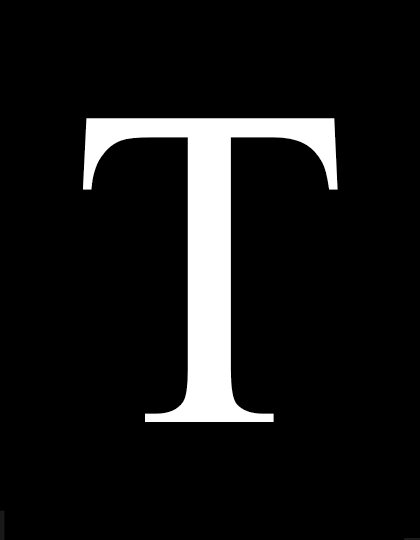

In [4]:
# read example image
image = cv.imread("Fig0236(a)(letter_T).tif")
cv2_imshow(image)

### Transformation: Scaling / Reflection

$
\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}
=
\begin{bmatrix}
{c}_{x} & 0 & 0 \\
0 & {c}_{y} & 0 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
{c}_{x}x \\
{c}_{y}y \\
\end{bmatrix}
$

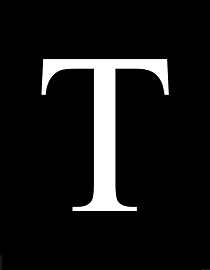

In [5]:
# scale image down by 2
output = cv.resize(image, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
cv2_imshow(output)

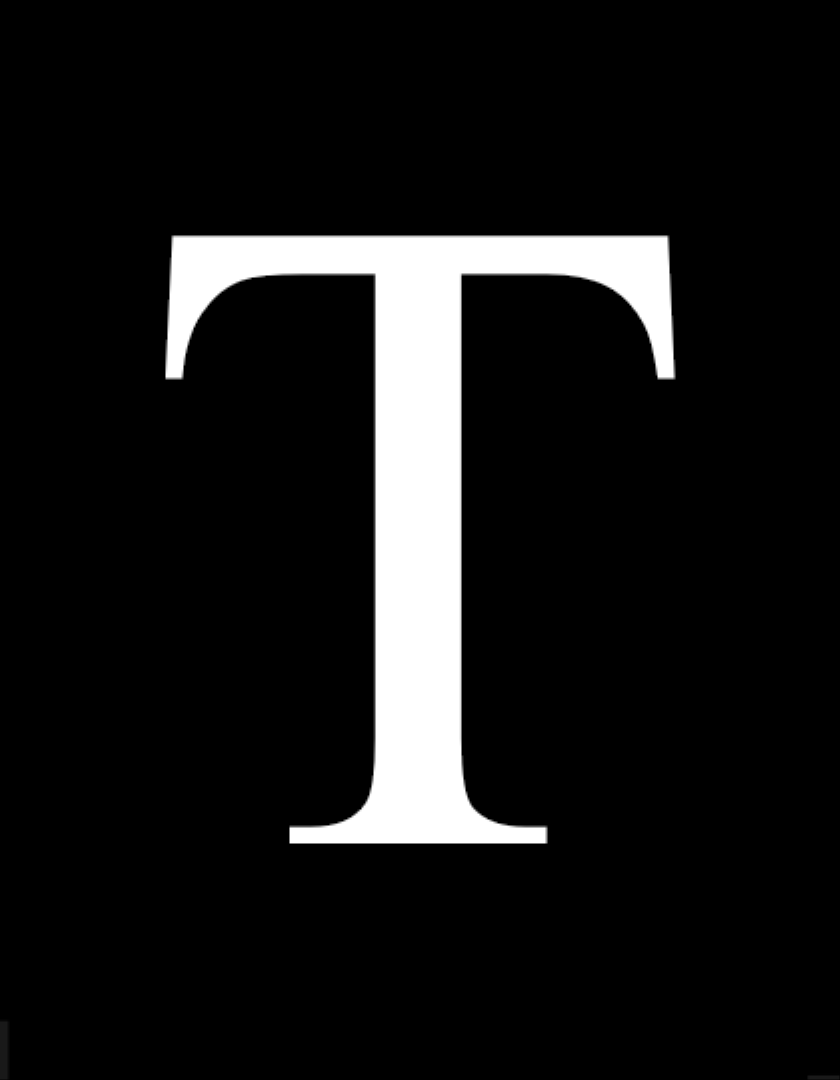

In [6]:
# scale image up by 2 along both x and y
k = 2
# create translation transformation matrix
T = np.float32([[k, 0, 0], [0, k, 0]])
# apply transformation
output = cv.warpAffine(src=image, M=T, dsize=(image.shape[1] * k,
                                              image.shape[0] * k))

cv2_imshow(output)

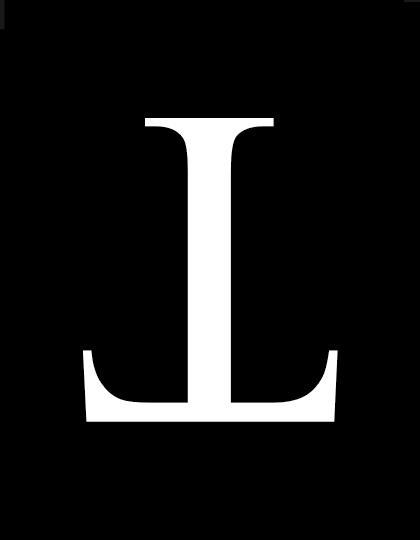

In [7]:
# reflect image vertically (along x-axis)
output = cv.flip(image, 0)
cv2_imshow(output)

### Transformation: Translation

$
\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & {t}_{x} \\
0 & 1 & {t}_{y} \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
x + {t}_{x} \\
y + {t}_{y} \\
\end{bmatrix}
$

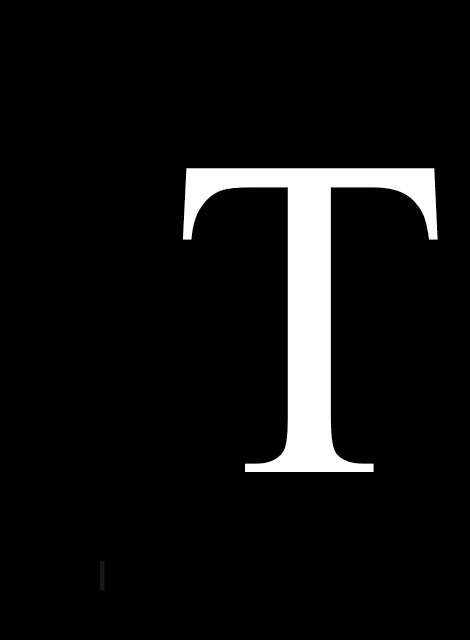

In [8]:
# create translation transformation matrix
xT = 100
yT = 50
T = np.float32([[1, 0, xT], [0, 1, yT]])
# apply transformation
output = cv.warpAffine(src=image, M=T, dsize=(image.shape[1] + yT,
                                              image.shape[0] + xT))
cv2_imshow(output)

### Transformation: Rotation

$
\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}
=
\begin{bmatrix}
cos{\theta} & -sin{\theta} & 0 \\
sin{\theta} & cos{\theta} & 0 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
xcos{\theta} - ysin{\theta} \\
xsin{\theta} + ycos{\theta} \\
\end{bmatrix}
$

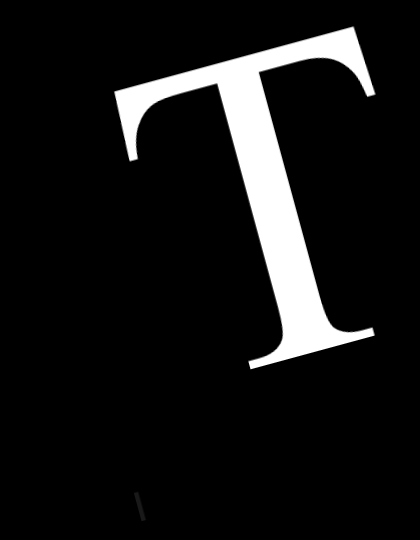

In [27]:
# anti-clockwise rotation angle around origin
sigma = 50
# define transformation matrix
T = np.float32([[np.cos(sigma), -np.sin(sigma), 0],
                [np.sin(sigma), np.cos(sigma), 0]])
# apply transformation
output = cv.warpAffine(src=image, M=T, dsize=(image.shape[1], image.shape[0]))
cv2_imshow(output)

### Transformation: Vertical shear

$
\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}
=
\begin{bmatrix}
1 & {s}_{v} & 0 \\
0 & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
x + {s}_{v}y \\
y \\
\end{bmatrix}
$

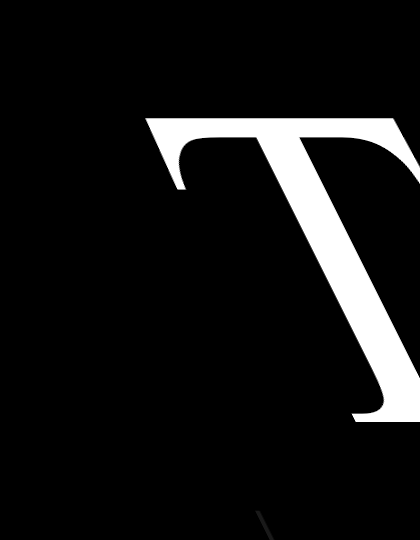

In [30]:
# define transformation matrix
T = np.float32([[1, 0.5, 0],
                [0, 1, 0]])
# apply transformation
output = cv.warpAffine(src=image, M=T, dsize=(image.shape[1], image.shape[0]))
cv2_imshow(output)

### Transformation: Horizontal shear

$
\begin{bmatrix}
x' \\
y' \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
{s}_{h} & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1 \\
\end{bmatrix}
=
\begin{bmatrix}
x \\
{s}_{h}x + y \\
\end{bmatrix}
$

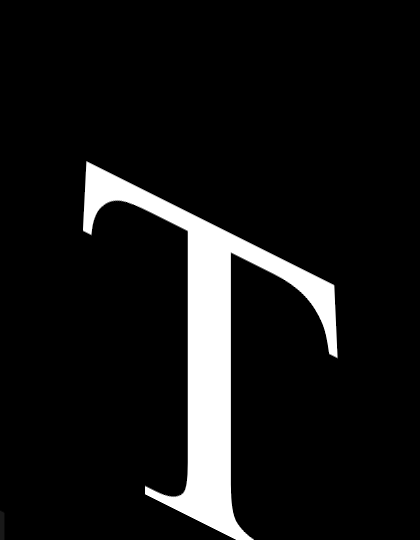

In [31]:
# define transformation matrix
T = np.float32([[1, 0, 0],
                [0.5, 1, 0]])
# apply transformation
output = cv.warpAffine(src=image, M=T, dsize=(image.shape[1], image.shape[0]))
cv2_imshow(output)